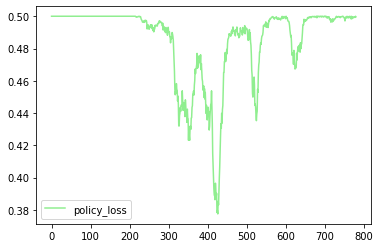

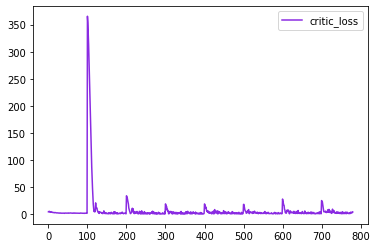

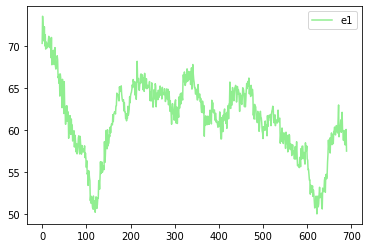

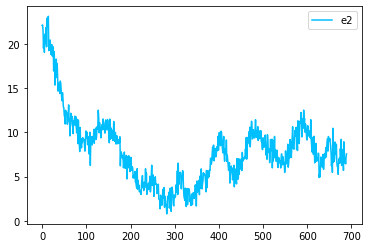

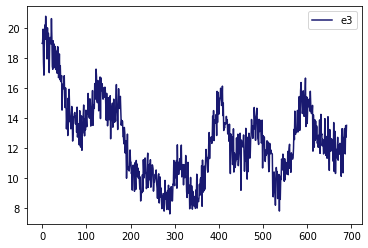

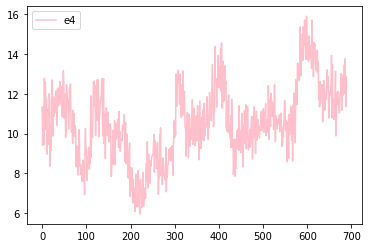

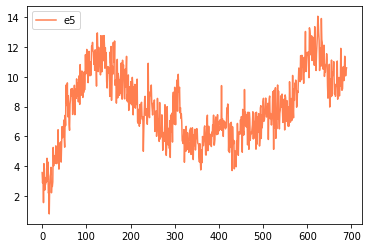

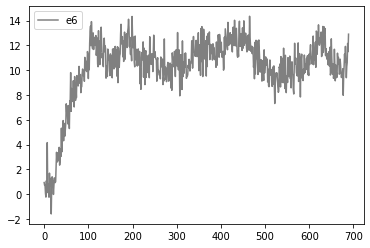

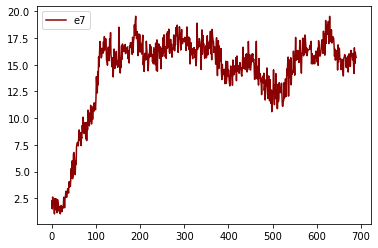

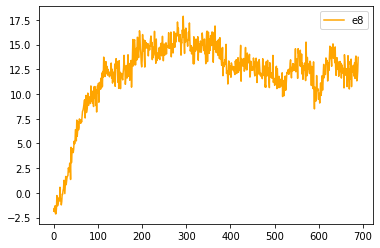

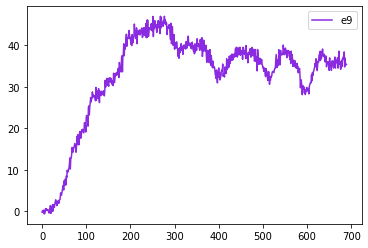

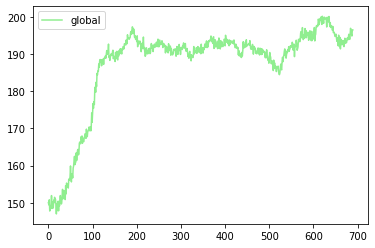

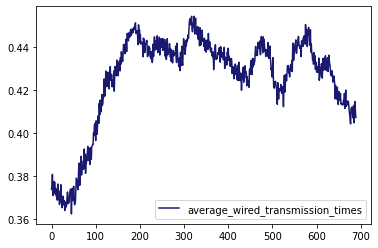

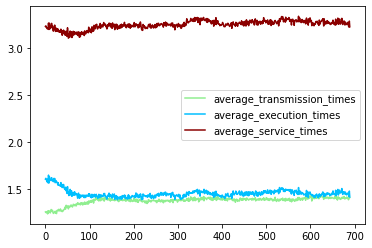

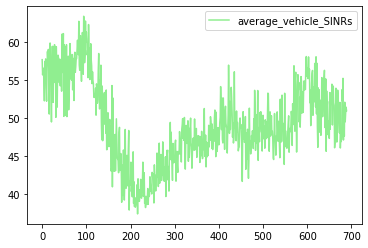

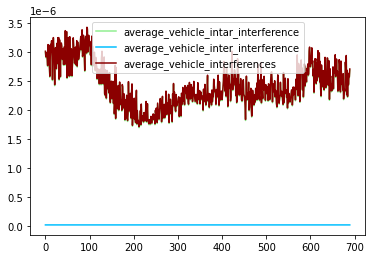

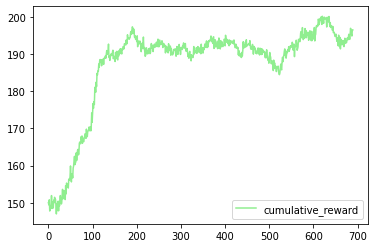

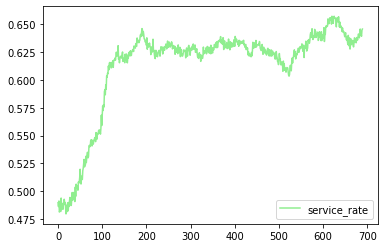

620
cumulative_reward:  200.15024838778064
average_edge_reward:  19.616432241111113
service_rate:  0.6571705158346011
average_interference:  2.9851029577676342e-06
average_service_time:  3.2985465548820803
average_wired_transmission_time:  0.4359101519601766


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

file_name = "/home/neardws/acme/ae6cb3d6-f788-11ec-bd4f-04d9f5632a58/"

file_name = "/home/neardws/acme/da17c184-f796-11ec-85d1-04d9f5632a58/"

# change the task assignment
file_name = "/home/neardws/acme/86504512-f79b-11ec-ad3b-04d9f5632a58/"

# change the edge node reward 
file_name = "/home/neardws/acme/e067ee42-f7a0-11ec-a179-04d9f5632a58/"

# 23:00 - 23:05
file_name = "/home/neardws/acme/60f4a960-f7f1-11ec-a7ad-04d9f5632a58/"

# 5 MHz
file_name = "/home/neardws/acme/cd967674-f7f7-11ec-90a6-04d9f5632a58/"

# 15 MHz
file_name = "/home/neardws/acme/1244e2f6-f7f8-11ec-9306-04d9f5632a58/"

start_index = 0
loss_file_name = file_name + "logs/learner/logs.csv"
returns_file_name = file_name + "logs/train_loop/logs.csv"

name=["critic_loss", "policy_loss", "steps", "walltime"]
loss_df = pd.read_csv(loss_file_name, names=name, header=0)

policy_loss = loss_df["policy_loss"].values.tolist()
epoch_index = [i for i in range(len(policy_loss))]
epoch_index = epoch_index[start_index:]
plt.plot(epoch_index, policy_loss[start_index: ], '-', color='lightgreen', label='policy_loss')
plt.legend(loc="best")  # 图例
plt.show()


critic_loss = loss_df["critic_loss"].values.tolist()
epoch_index = [i for i in range(len(critic_loss))]
epoch_index = epoch_index[start_index:]
plt.plot(epoch_index, critic_loss[start_index: ], '-', color='blueviolet', label='critic_loss')
plt.legend(loc="best")  # 图例
plt.show()

names=["average_execution_times", "average_service_times", "average_transmision_times", "average_vehicle_SINRs", "average_vehicle_intar_interference", "average_vehicle_inter_interference",  "average_vehicle_interferences", "average_wired_transmission_times", "cumulative_reward", "episode_length", "episode_return", "episodes", "service_rate", "steps", "steps_per_second"]
# returns_df = pd.read_csv(returns_file_name, names=["actor_episodes", "actor_steps", "episode_length", "episode_return", "evaluator_episodes", "evaluator_steps", "steps_per_second"], header=0)
returns_df = pd.read_csv(returns_file_name, names=names, header=0)
episode_return = returns_df["episode_return"].values
returns = np.zeros(shape=(len(episode_return), 10))

for ret_index in range(episode_return.shape[0]):
    process_str = episode_return[ret_index].replace("[", "").replace("]", "").split(" ")
    while "" in process_str:
        process_str.remove("")
    for index in range(len(process_str)):
        s = process_str[index]
        if process_str[index].endswith("\n"):
            s = s.replace("\n", "")
        f_s = float(s)
        returns[ret_index][index] = f_s


start_index = 0
end_index = -1
epoch_index = [i for i in range(episode_return.shape[0])]

epoch_index = epoch_index[start_index:end_index]

e1_return = returns[:, 0].tolist()
e2_return = returns[:, 1].tolist()
e3_return = returns[:, 2].tolist()
e4_return = returns[:, 3].tolist()
e5_return = returns[:, 4].tolist()
e6_return = returns[:, 5].tolist()
e7_return = returns[:, 6].tolist()
e8_return = returns[:, 7].tolist()
e9_return = returns[:, 8].tolist()
plt.plot(epoch_index, e1_return[start_index:end_index], '-', color='lightgreen', label='e1')
plt.legend(loc="best")  # 图例
plt.show()
plt.plot(epoch_index, e2_return[start_index:end_index], '-', color='deepskyblue', label='e2')
plt.legend(loc="best")  # 图例
plt.show()
plt.plot(epoch_index, e3_return[start_index:end_index], '-', color='midnightblue', label='e3')
plt.legend(loc="best")  # 图例
plt.show()
plt.plot(epoch_index, e4_return[start_index:end_index], '-', color='pink', label='e4')
plt.legend(loc="best")  # 图例
plt.show()
plt.plot(epoch_index, e5_return[start_index:end_index], '-', color='coral', label='e5')
plt.legend(loc="best")  # 图例
plt.show()
plt.plot(epoch_index, e6_return[start_index:end_index], '-', color='gray', label='e6')
plt.legend(loc="best")  # 图例
plt.show()
plt.plot(epoch_index, e7_return[start_index:end_index], '-', color='darkred', label='e7')
plt.legend(loc="best")  # 图例
plt.show()
plt.plot(epoch_index, e8_return[start_index:end_index], '-', color='orange', label='e8')
plt.legend(loc="best")  # 图例
plt.show()
plt.plot(epoch_index, e9_return[start_index:end_index], '-', color='blueviolet', label='e9')
plt.legend(loc="best")  # 图例
plt.show()

edge_return = returns[start_index:end_index, 9].tolist()
plt.plot(epoch_index, edge_return, '-', color='lightgreen', label='global')
plt.legend(loc="best")  # 图例
plt.show()

average_transmission_times = returns_df["average_transmision_times"].values
average_execution_times = returns_df["average_execution_times"].values
average_wired_transmission_times = returns_df["average_wired_transmission_times"].values
average_service_times = returns_df["average_service_times"].values
# plt.plot(epoch_index, average_transmission_times[start_index:end_index], '-', color='lightgreen', label='average_transmission_times')
# plt.plot(epoch_index, average_execution_times[start_index:end_index], '-', color='deepskyblue', label='average_execution_times')
plt.plot(epoch_index, average_wired_transmission_times[start_index:end_index], '-', color='midnightblue', label='average_wired_transmission_times')
# plt.plot(epoch_index, average_service_times[start_index:end_index], '-', color='darkred', label='average_service_times')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_transmission_times[start_index:end_index], '-', color='lightgreen', label='average_transmission_times')
plt.plot(epoch_index, average_execution_times[start_index:end_index], '-', color='deepskyblue', label='average_execution_times')
# plt.plot(epoch_index, average_wired_transmission_times[start_index:end_index], '-', color='midnightblue', label='average_wired_transmission_times')
plt.plot(epoch_index, average_service_times[start_index:end_index], '-', color='darkred', label='average_service_times')
plt.legend(loc="best")  # 图例
plt.show()


average_vehicle_SINRs = returns_df["average_vehicle_SINRs"].values
plt.plot(epoch_index, average_vehicle_SINRs[start_index:end_index], '-', color='lightgreen', label='average_vehicle_SINRs')
plt.legend(loc="best")  # 图例
plt.show()

average_vehicle_intar_interference = returns_df["average_vehicle_intar_interference"].values
average_vehicle_inter_interference = returns_df["average_vehicle_inter_interference"].values
average_vehicle_interferences = returns_df["average_vehicle_interferences"].values
plt.plot(epoch_index, average_vehicle_intar_interference[start_index:end_index], '-', color='lightgreen', label='average_vehicle_intar_interference')
plt.plot(epoch_index, average_vehicle_inter_interference[start_index:end_index], '-', color='deepskyblue', label='average_vehicle_inter_interference')
plt.plot(epoch_index, average_vehicle_interferences[start_index:end_index], '-', color='darkred', label='average_vehicle_interferences')
plt.legend(loc="best")  # 图例
plt.show()

cumulative_reward = returns_df["cumulative_reward"].values
plt.plot(epoch_index, cumulative_reward[start_index:end_index], '-', color='lightgreen', label='cumulative_reward')
plt.legend(loc="best")  # 图例
plt.show()

service_rate = returns_df["service_rate"].values
plt.plot(epoch_index, service_rate[start_index:end_index], '-', color='lightgreen', label='service_rate')
plt.legend(loc="best")  # 图例
plt.show()


maximum_cumulative_reward_index = cumulative_reward.argmax()
print(maximum_cumulative_reward_index)

print("cumulative_reward: ", cumulative_reward[maximum_cumulative_reward_index])
print("average_edge_reward: ", (e1_return[maximum_cumulative_reward_index] + e2_return[maximum_cumulative_reward_index] + e3_return[maximum_cumulative_reward_index] + e4_return[maximum_cumulative_reward_index] + e5_return[maximum_cumulative_reward_index] + e6_return[maximum_cumulative_reward_index] + e7_return[maximum_cumulative_reward_index] + e8_return[maximum_cumulative_reward_index] + e9_return[maximum_cumulative_reward_index]) / 9)
print("service_rate: ", service_rate[maximum_cumulative_reward_index])
print("average_interference: ", average_vehicle_interferences[maximum_cumulative_reward_index])
print("average_service_time: ", average_service_times[maximum_cumulative_reward_index])
print("average_wired_transmission_time: ", average_wired_transmission_times[maximum_cumulative_reward_index])